In [51]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [52]:
# load in races csv file
csv_path = "Resources/races.csv"
races_df = pd.read_csv(csv_path)
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [53]:
# load in results csv file
csv_path = "Resources/results.csv"
results_df = pd.read_csv(csv_path)
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [54]:
# load in status csv file
csv_path = "Resources/status.csv"
status_df = pd.read_csv(csv_path)
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [55]:
# load in drivers csv file
csv_path = "Resources/drivers.csv"
drivers_df = pd.read_csv(csv_path)
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [56]:
# merge the status dataframe into the results dataframe
merged_res_stat_df = pd.merge(results_df, status_df, on=['statusId'])
merged_res_stat_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished


In [57]:
# merge the races dataframe into the merged_res_stat dataframe
merged_df = pd.merge(merged_res_stat_df, races_df, on=['raceId'])
merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [58]:
# merge the drivers dataframe into the merged dataframe
fully_merged_df = pd.merge(merged_df, drivers_df, on=['driverId'])
fully_merged_df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [59]:
# save merged file to csv
fully_merged_df.to_csv('fully_merged2.csv', index=True)

In [60]:
# create copy of merged dataframe and sort by year
# create a new dataframe to store resultId, raceId, driverId, statusId, status and date
id_df = fully_merged_df[['year','round','raceId','resultId','driverId','forename', 'surname','statusId','status']].copy().sort_values(by=['year','round'])
id_df.head(40)

,year,round,raceId,resultId,driverId,forename,surname,statusId,status
21514,1950,1,833,20036,579,Juan,Fangio,44,Oil leak
21620,1950,1,833,20042,589,Louis,Chiron,8,Clutch
21754,1950,1,833,20030,619,Bob,Gerard,13,+3 Laps
21811,1950,1,833,20029,627,Louis,Rosier,12,+2 Laps
21946,1950,1,833,20041,640,Toulo,de Graffenried,5,Engine
21999,1950,1,833,20025,642,Nino,Farina,1,Finished
22161,1950,1,833,20035,660,Johnny,Claes,16,+6 Laps
22170,1950,1,833,20044,661,Peter,Walker,6,Gearbox
22173,1950,1,833,20178,666,Tony,Rolt,6,Gearbox
22232,1950,1,833,20038,669,Prince,Bira,60,Out of fuel


In [61]:
# find the total number of drivers in each round per season
entrants_df = id_df.groupby(by=['year','round']).size().reset_index(name='sum entrants')
entrants_df.head(20)

,year,round,sum entrants
0,1950,1,23
1,1950,2,21
2,1950,3,35
3,1950,4,18
4,1950,5,14
5,1950,6,20
6,1950,7,29
7,1951,1,21
8,1951,2,34
9,1951,3,13


In [62]:
# create dataframe with the row information from columns
select_df = id_df['status'].isin(['Injury', 'Injured','Eye injury'])
injured_df = id_df.loc[select_df]
injured_df

,year,round,raceId,resultId,driverId,forename,surname,statusId,status
19912,1966,6,695,16924,389,Guy,Ligier,82,Injury
18655,1972,6,625,15464,337,Helmut,Marko,107,Eye injury
14207,1977,5,547,13363,182,Niki,Lauda,73,Injured
13828,1982,14,480,11481,175,Patrick,Tambay,82,Injury
8798,1985,7,426,9997,95,Nigel,Mansell,82,Injury
11337,1987,2,389,9037,137,Nelson,Piquet,82,Injury
10755,1988,6,377,8674,122,Ivan,Capelli,73,Injured
11960,1990,14,334,7486,151,Martin,Donnelly,73,Injured
7317,1993,12,284,5894,70,Alessandro,Zanardi,82,Injury
4122,1994,3,259,5221,22,Rubens,Barrichello,82,Injury


In [63]:
# create a copy of the inujured_df dataframe and convert the statusID column values to '1'
statusId_df = injured_df.copy()
statusId_df['statusId'].replace([82,73,107],1,inplace=True)
statusId_df

,year,round,raceId,resultId,driverId,forename,surname,statusId,status
19912,1966,6,695,16924,389,Guy,Ligier,1,Injury
18655,1972,6,625,15464,337,Helmut,Marko,1,Eye injury
14207,1977,5,547,13363,182,Niki,Lauda,1,Injured
13828,1982,14,480,11481,175,Patrick,Tambay,1,Injury
8798,1985,7,426,9997,95,Nigel,Mansell,1,Injury
11337,1987,2,389,9037,137,Nelson,Piquet,1,Injury
10755,1988,6,377,8674,122,Ivan,Capelli,1,Injured
11960,1990,14,334,7486,151,Martin,Donnelly,1,Injured
7317,1993,12,284,5894,70,Alessandro,Zanardi,1,Injury
4122,1994,3,259,5221,22,Rubens,Barrichello,1,Injury


In [64]:
# merge the entrants dataframe with the injured dataframe
injury_racers_df = pd.merge(entrants_df, injured_df, on=['year','round'], how= 'left')
injury_racers_df

,year,round,sum entrants,raceId,resultId,driverId,forename,surname,statusId,status
0,1950,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950,2,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950,3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,4,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950,5,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1074,2022,18,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,2022,19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,2022,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,2022,21,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
injury_racers_df['statusId'].replace([82,73,107],1,inplace=True)
injury_racers_df

,year,round,sum entrants,raceId,resultId,driverId,forename,surname,statusId,status
0,1950,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950,2,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950,3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,4,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950,5,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1074,2022,18,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,2022,19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,2022,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,2022,21,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
injury_racers_df.to_csv('drivers.csv', index=True)

In [67]:
# replace any NaN entries in the statusID column with a '0'
injury_racers_df['statusId'].fillna(0, inplace= True)
injury_racers_df

,year,round,sum entrants,raceId,resultId,driverId,forename,surname,statusId,status
0,1950,1,23,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1950,2,21,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1950,3,35,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,1950,4,18,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1950,5,14,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1074,2022,18,20,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1075,2022,19,20,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1076,2022,20,20,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1077,2022,21,20,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [68]:
# in the injured column convert values from float to integers
injury_racers_df['statusId'] = injury_racers_df['statusId'].astype(int)
injury_racers_df

,year,round,sum entrants,raceId,resultId,driverId,forename,surname,statusId,status
0,1950,1,23,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1950,2,21,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1950,3,35,NaN,NaN,NaN,NaN,NaN,0,NaN
3,1950,4,18,NaN,NaN,NaN,NaN,NaN,0,NaN
4,1950,5,14,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1074,2022,18,20,NaN,NaN,NaN,NaN,NaN,0,NaN
1075,2022,19,20,NaN,NaN,NaN,NaN,NaN,0,NaN
1076,2022,20,20,NaN,NaN,NaN,NaN,NaN,0,NaN
1077,2022,21,20,NaN,NaN,NaN,NaN,NaN,0,NaN


In [74]:
injury_racers_df = injury_racers_df.rename(columns={'sum entrants': 'total drivers', 'statusId': 'injured'})
injury_racers_df

,year,round,total drivers,raceId,resultId,driverId,forename,surname,injured,status
0,1950,1,23,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1950,2,21,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1950,3,35,NaN,NaN,NaN,NaN,NaN,0,NaN
3,1950,4,18,NaN,NaN,NaN,NaN,NaN,0,NaN
4,1950,5,14,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1074,2022,18,20,NaN,NaN,NaN,NaN,NaN,0,NaN
1075,2022,19,20,NaN,NaN,NaN,NaN,NaN,0,NaN
1076,2022,20,20,NaN,NaN,NaN,NaN,NaN,0,NaN
1077,2022,21,20,NaN,NaN,NaN,NaN,NaN,0,NaN


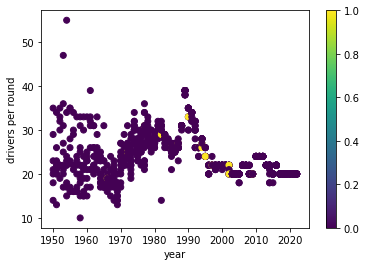

In [78]:
# create a scatter plot
plt.scatter(injury_racers_df['year'], injury_racers_df['total drivers'], c=injury_racers_df['injured'])

# add axis labels
plt.xlabel('Year')
plt.ylabel('Drivers per round')

# add a colorbar to show the different statusIds
plt.colorbar();

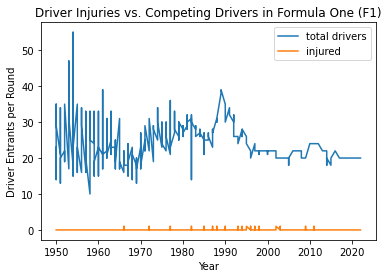

In [81]:
# create plot chart
injury_racers_df.plot(x='year', y=['total drivers', 'injured'])

#Add labels and title
plt.xlabel('Year')
plt.ylabel('Driver Entrants per Round')
plt.title('Driver Injuries vs. Competing Drivers in Formula One (F1)');

# save the chart
plt.savefig('injured_vs_drivers.png')